# Matplotlib tutorial: Plotting tweets #


Python has a few different visualization libraries but most of them are based on Matplotlib.  In this tutorial I will ocver the basics. 

We’ll be working with a dataset of approximately 240,000 tweets about Hillary Clinton, Donald Trump, and Bernie Sanders, who were all current candidates for president of the United States at the time of writing. 

The data was pulled from the Twitter Streaming API, and the csv of all 240,000 tweets is included in the data/tweets.csv directory. 


## Exploring tweets with Pandas ##

As usual we will be using Pandas for data exploration. 

In [1]:
import pandas as pd

tweets = pd.read_csv("../data/tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


# Making the first plot

In general in matplotlib drawing a plot involves:

- Creating a figure to draw plots into
- Creating one or more axes objects to draw the plots
- Showing the figure, and any plots inside, as an image

This is a little bit more complicated than what we want to do here. In our examples we won't create figure or axes objects. 
This is because there are a few common types of plots that make the Figure and Axes objects automatically and then the **plt.show()** method will show anything in the current figure. 

The common types of plots are:

plt.bar – creates a bar chart.
plt.boxplot – makes a box and whisker plot.
plt.hist – makes a histogram.
plt.plot – creates a line plot.
plt.scatter – makes a scatter plot.
Calling any of these methods will automatically setup Figure and Axes objects, and draw the plot. Each of these methods has different parameters that can be passed in to modify the resulting plot.



## Importing matplotlib

In order to use matplotlib, you’ll need to first import the library using **import matplotlib.pyplot as plt**. <br>
Since we are using IPython (or Jupyter) notebooks, we can  setup matplotlib to work inside the notebook using **%matplotlib inline**.

We import **matplotlib.pyplot** because this contains the plotting functions of matplotlib. We rename it to plt for convenience, so it’s faster to make plots.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline




## Making a bar plot

In this section we will be making a bar plot


## Generating a Candidates Column

Generating a candidates column
Most of the interesting things we can do with this dataset involve comparing the tweets about one candidate to the tweets about another candidate. For example, we could compare how  tweets about Donald Trump to tweets about Bernie Sanders.

In order to accomplish this, we first need to generate a column that tells us what candidates are mentioned in each tweet. In the below code, we will:

- Create a function that finds what candidate names occur in a piece of text.
- Use the **apply** method on DataFrames to generate a new column called candidate that contains what candidate(s) the tweet mentions.


In [ ]:

# function that finds what candidate names occur in a piece of text.
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

# Use the apply method on DataFrames to generate a new column 
# called candidate that contains what candidate(s) the tweet mentions.
tweets["candidate"] = tweets.apply(get_candidate,axis=1)

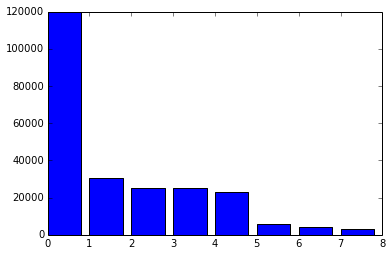

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [4]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


/Users/gussand/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


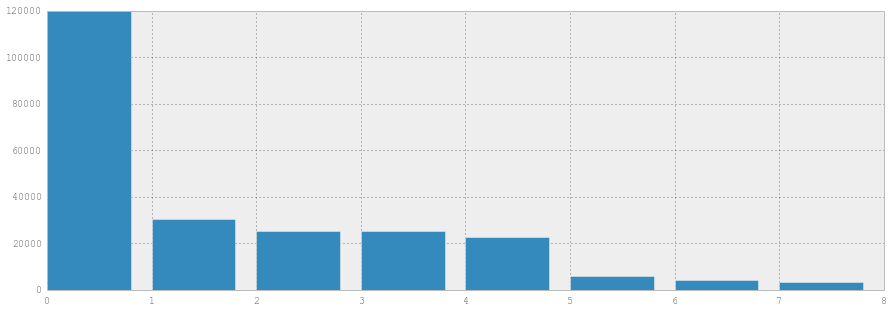

In [5]:

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

plt.bar(range(len(counts)), counts)
plt.show

print counts







## Making a histogram

In this part we will make a basic histogram then modify it to add labels and other information

One of the things we can look at is the age of the user accounts that are tweeting. We’ll be able to find if there differences in when the accounts of users who tweet about Trump and when the accounts of users who tweet about Clinton were created. One candidate having more user accounts created recently might imply some kind of manipulation of Twitter with fake accounts.

In the code below, we’ll:

Convert the **created** and **user_created** columns to the Pandas datetime type.
Create a **user_age** column that is the number of days since the account was created.
Create a histogram of user ages.
Show the histogram.


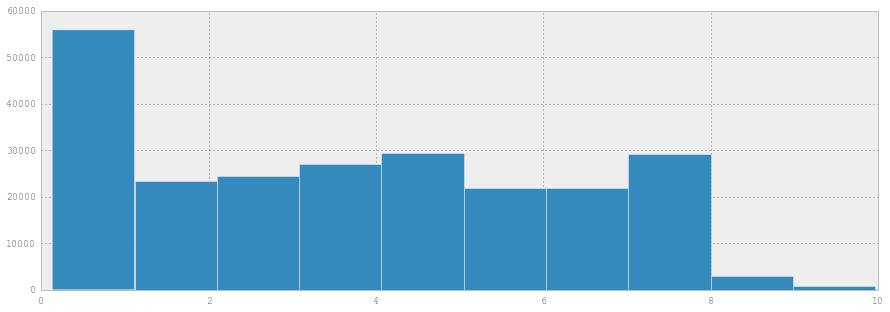

In [6]:
from datetime import datetime

tweets['created'] = pd.to_datetime(tweets['created'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])

# new user_age column
tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()


## Adding Labels

We can add titles and axis labels to matplotlib plots. The common methods with which to do this are:

**plt.title** – adds a title to the plot. <br>
**plt.xlabel** – adds an x-axis label. <br>
**plt.ylabel** – adds a y-axis label. <br>



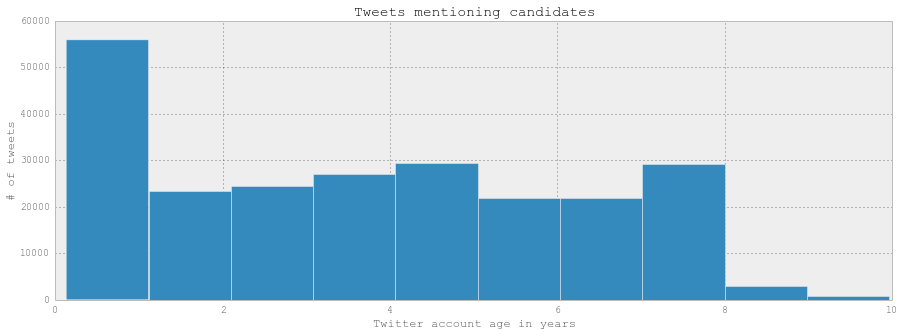

In [7]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

What if you wanted to change the size of the text ? You can do that. 

There's a wealth of information here:
http://matplotlib.org/examples/index.html




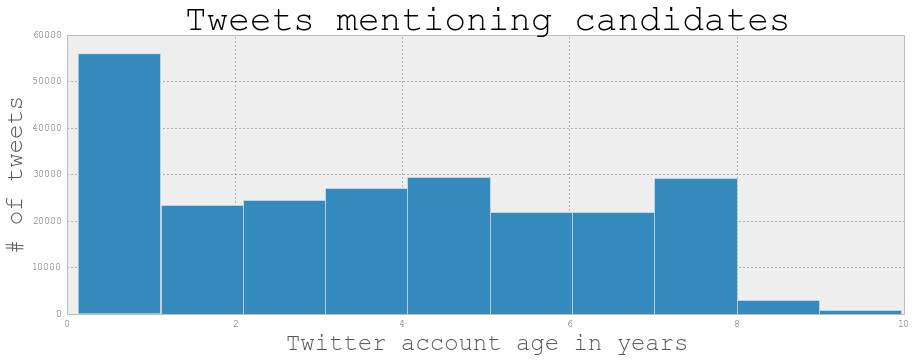

In [8]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates", fontsize= 36)
plt.xlabel("Twitter account age in years", fontsize = 24)
plt.ylabel("# of tweets", fontsize = 24)
plt.show()

## Making a stacked histogram

So this gives us some data, but it doesn't break it down by candidate. This might be more interesting. Let's use additional options on the histogram method to create a stacked histogram. 


In the code below we will:

- Generate 3 Pandas Series, each containing the **user_age** data only for tweets about a certain candidate

- Make a stacked histogram by calling the **hist** method with additional options

- Call the **plt.legend** method to draw a legend on the top right corner

- Add title and axis labels

- Show the plot


In [9]:
# Generate 3 Pandas Series, each containing the user_age data 
# only for tweets about a certain candidate

cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]


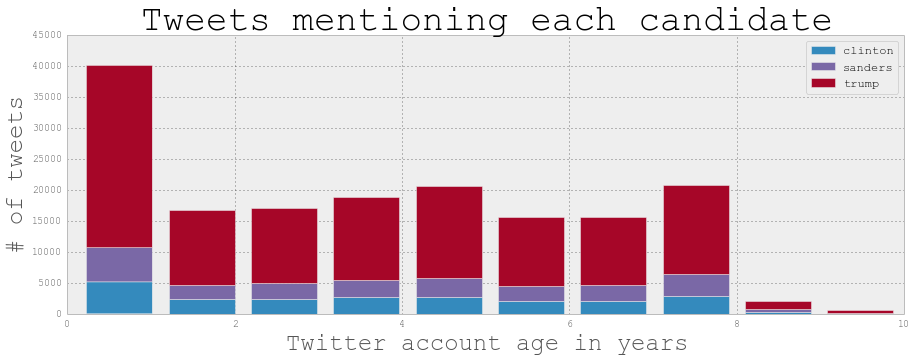

In [13]:
# Make a stacked histogram by calling the hist method with additional options.
# - Specifying a list as the input will plot three sets of histogram bars.
# - Specifying stacked=True will stack the three sets of bars.
# - Adding the label option will generate the correct labels for the legend.
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)

# Call the plt.legend method to draw a legend on the top right corner
plt.legend()

#Add title and axis labels
plt.title("Tweets mentioning each candidate", fontsize=36)
plt.xlabel("Twitter account age in years", fontsize = 24)
plt.ylabel("# of tweets", fontsize = 24)

plt.show()

## Annotating the histogram

We can take advantage of matplotlibs ability to draw text over plots to add annotations. Annotations point to a specific part of the chart, and let us add a snippet describing something to look at.

In the code below, we’ll make the same histogram as we did above, but we’ll call the plt.annotate method to add an annotation to the plot.

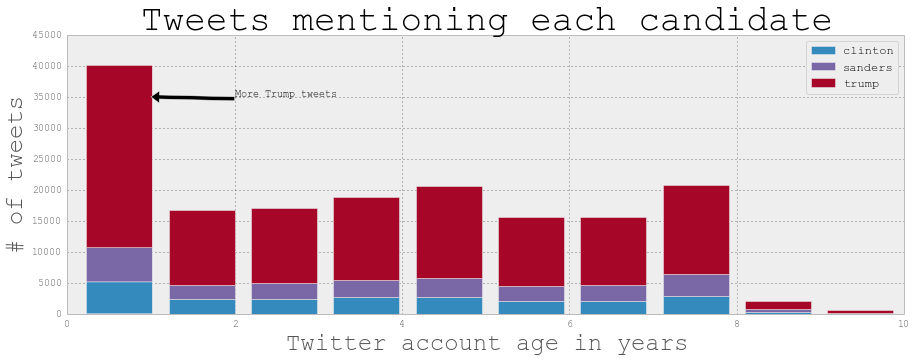

In [16]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)

# Call the plt.legend method to draw a legend on the top right corner
plt.legend()

#Add title and axis labels
plt.title("Tweets mentioning each candidate", fontsize=36)
plt.xlabel("Twitter account age in years", fontsize = 24)
plt.ylabel("# of tweets", fontsize = 24)

# add annotation
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))

plt.show()

## Generating a side by side bar plot


In this example we will build a more complex plot. Since it's not one of the base ones, we will have to work with figures and axes. 

## Plotting Candidates by Tweet Length 

We can plot tweet length by candidate using a bar plot. We’ll first split the tweets into short, medium, and long tweets. Then, we’ll count up how many tweets mentioning each candidate fall into each group. Then, we’ll generate a bar plot with bars for each candidate side by side.

To plot the tweet lengths, we’ll first have to categorize the tweets, then figure out how many tweets by each candidate fall into each bin.

In the code below, we’ll:

- Define a function to mark a tweet as short if it’s less than 100 characters, medium if it’s 100 to 135 characters, and long if it’s over 135 characters.
- Use apply to generate a new column tweet_length.
- Figure out how many tweets by each candidate fall into each group.

In [18]:
# function that classifies the tweets
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

# Generate the new column
tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)



{'clinton': long      10584
 medium     7484
 short      4678
 Name: tweet_length, dtype: int64, 'sanders': long      12581
 medium     7808
 short      4962
 Name: tweet_length, dtype: int64, 'trump': long      55912
 medium    37798
 short     26288
 Name: tweet_length, dtype: int64}

In [32]:
tweets['tweet_length'].value_counts()


long      108097
medium     73641
short      55742
Name: tweet_length, dtype: int64

In [33]:
tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()
    
tl

{'clinton': long      10584
 medium     7484
 short      4678
 Name: tweet_length, dtype: int64, 'sanders': long      12581
 medium     7808
 short      4962
 Name: tweet_length, dtype: int64, 'trump': long      55912
 medium    37798
 short     26288
 Name: tweet_length, dtype: int64}

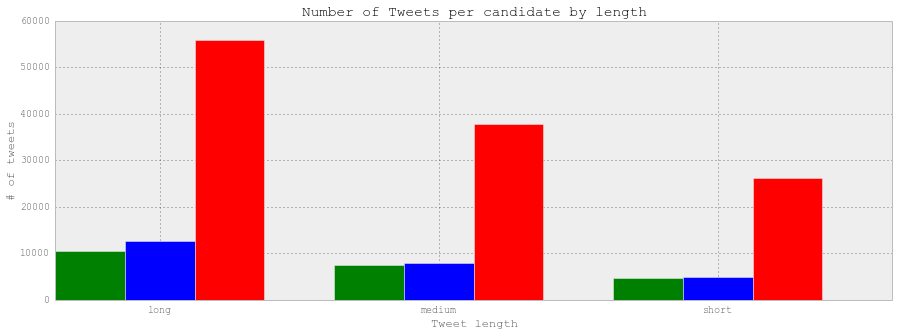

In [34]:

# create a figure and a single axes object
fig, ax = plt.subplots()

# define the width for each bar
width = .5

# Generate a sequence of values, x, that is 0, 2, 4
# Each value is hte start of a category, such as short
# medium and long.  We put a distance of 2 between each 
# category sow we have space for multiple bars.
x = np.array(range(0, 6, 2))

# Plot clinton tweet on the axes object, with the bars on 
# the positions defined by x
ax.bar(x, tl["clinton"], width, color='g')

# Plot Sanders but add width to move it to right
ax.bar(x + width, tl["sanders"], width, color='b')

# same with trump, we add x* width
ax.bar(x + (width * 2), tl["trump"], width, color='r')

# Set x & y labels
ax.set_ylabel('# of tweets')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')

# Set title
ax.set_title('Number of Tweets per candidate by length')

# Finally show the thing
plt.show()